In [1]:
#!rm -rf code
#!git clone https://sergeivolodin@bitbucket.org/sergeivolodin/probabilisticneuronfailurecodenew.git code
#!mv code/* .
%load_ext autoreload
%autoreload 2
%matplotlib inline
from helpers import *
from matplotlib import pyplot as plt
import numpy as np
from experiment_datasets import *
import pandas as pd
import seaborn as sns
import pickle

Using TensorFlow backend.


Initialized TensorFlow


### Fixed single Boston experiment for all dataset as points

In [2]:
# pfailure for the first layer
p = 1e-2
np.random.seed(42)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                700       
_________________________________________________________________
dense_2 (Dense)              (None, 49)                2499      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 50        
Total params: 3,249
Trainable params: 3,249
Non-trainable params: 0
_________________________________________________________________
Train on 404 samples, validate on 102 samples
Epoch 1/50
404/404 [==============================] - 1s 1ms/step - loss: 531.2130 - categorical_accuracy: 1.0000 - mean_squared_error: 531.2130 - mean_absolute_error: 21.1292 - val_loss: 554.3857 - val_categorical_accuracy: 1.0000 - val_mean_squared_error: 554.3857 - val_mean_absolute_error: 21.6956
Epoch 2/50
404/404 [==============================] - 0s

Epoch 26/50
404/404 [==============================] - 0s 7us/step - loss: 293.2552 - categorical_accuracy: 1.0000 - mean_squared_error: 293.2552 - mean_absolute_error: 14.4888 - val_loss: 306.2101 - val_categorical_accuracy: 1.0000 - val_mean_squared_error: 306.2101 - val_mean_absolute_error: 15.0379
Epoch 27/50
404/404 [==============================] - 0s 31us/step - loss: 287.0847 - categorical_accuracy: 1.0000 - mean_squared_error: 287.0847 - mean_absolute_error: 14.2812 - val_loss: 299.9984 - val_categorical_accuracy: 1.0000 - val_mean_squared_error: 299.9984 - val_mean_absolute_error: 14.8523
Epoch 28/50
404/404 [==============================] - 0s 51us/step - loss: 281.1357 - categorical_accuracy: 1.0000 - mean_squared_error: 281.1357 - mean_absolute_error: 14.0786 - val_loss: 293.9557 - val_categorical_accuracy: 1.0000 - val_mean_squared_error: 293.9557 - val_mean_absolute_error: 14.6713
Epoch 29/50
404/404 [==============================] - 0s 54us/step - loss: 275.3815 - ca

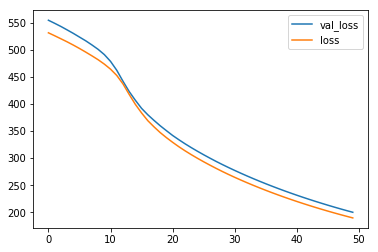

Creating network for 13-dimensional input and 1-dimensional output, with 2 hidden layers
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 50)                700       
_________________________________________________________________
lambda_1 (Lambda)            (None, 50)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 49)                2499      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 50        
Total params: 3,249
Trainable params: 3,249
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 50)            

In [3]:
# run with random weights and multiple inputs
exp = BostonHousingExperiment(N = [50, 49], p_inference = [0, p, 0, 0], seed = 2, activation = 'sigmoid', epochs = 50, do_print = True)

In [26]:
# obtaining data points
data = exp.get_inputs('all')

# obtaining errors and bounds for data points
rmean, rstd = exp.run(data, repetitions = 50000)

In [4]:
fn = 'ErrorComparisonBostonSingleNetwork.pkl'

In [ ]:
pickle.dump((rmean, rstd), open(fn, 'wb'))
from google.colab import files
files.download(fn)

In [5]:
rmean, rstd = pickle.load(open(fn, 'rb'))

/localhome/volodin/miniconda3/envs/neuronfailure/lib/python3.6/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


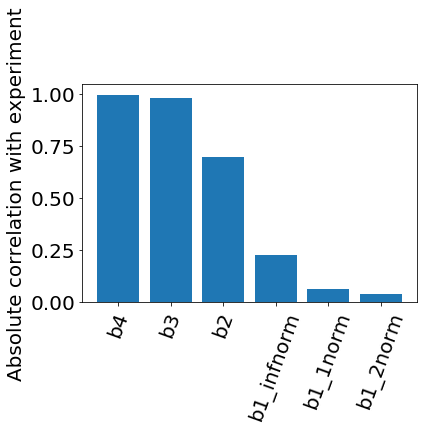

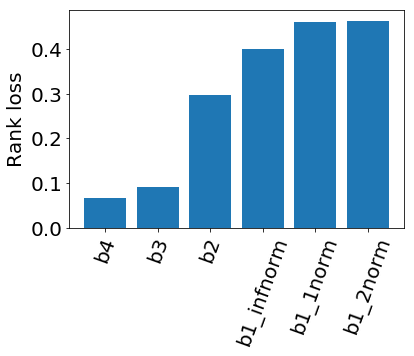

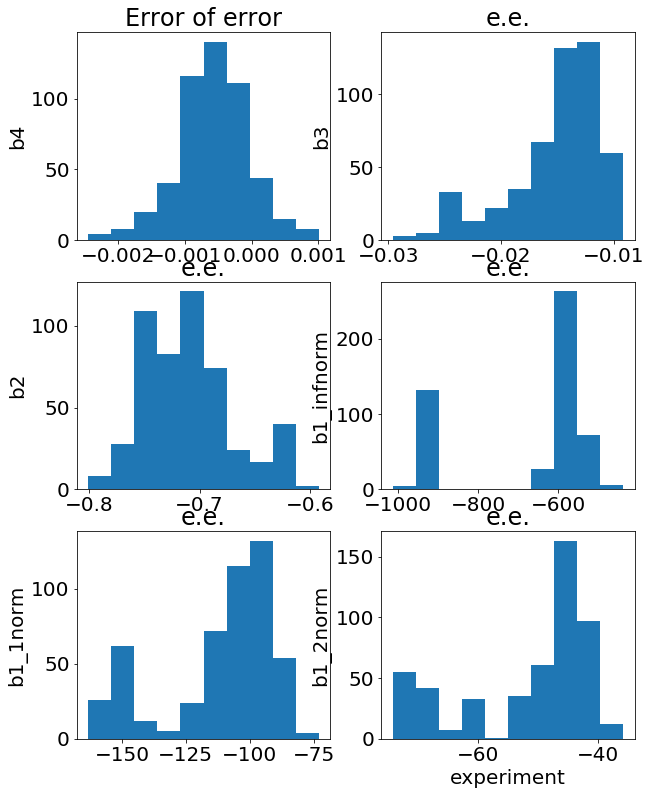

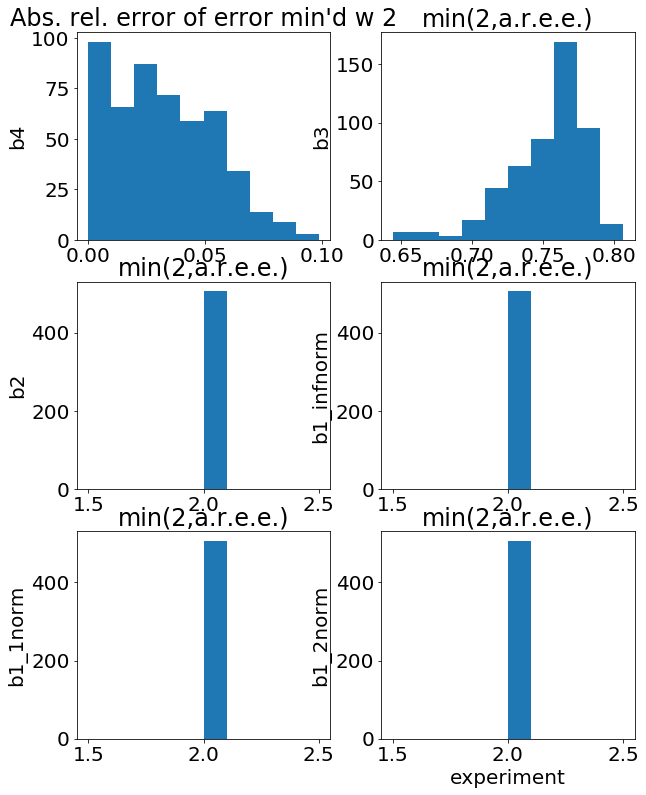

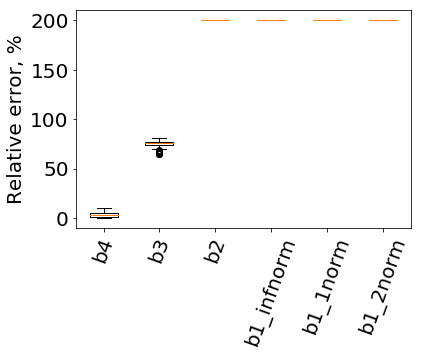

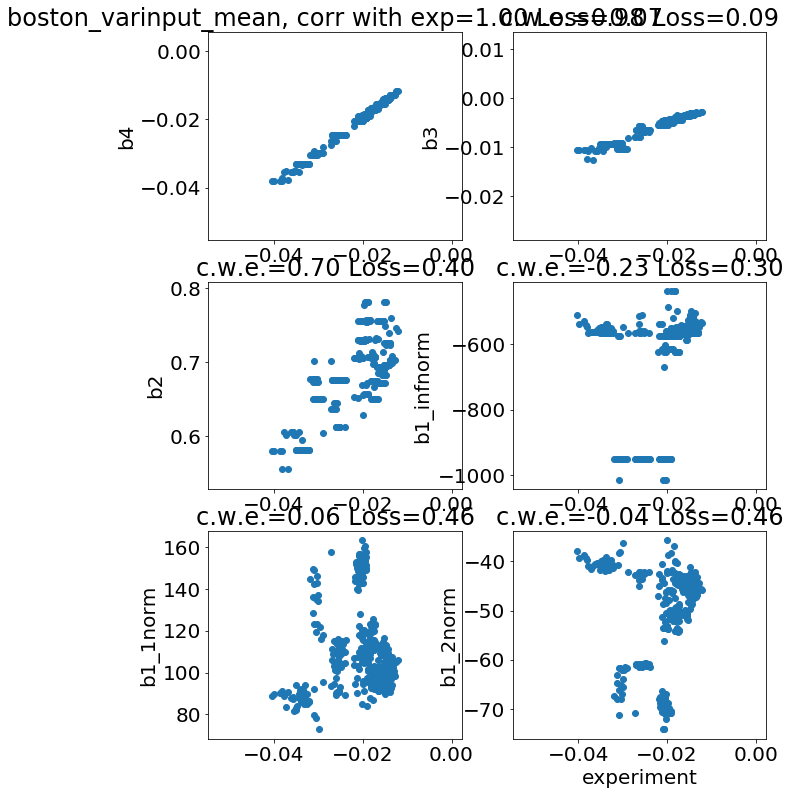

,bound,corr,rank_loss
0,b4,0.996170,0.067632
1,b3,0.978742,0.091504
2,b2,0.695423,0.400697
3,b1_infnorm,-0.227117,0.296701
4,b1_1norm,0.060191,0.463421
5,b1_2norm,-0.039521,0.461018


In [6]:
# showing results for mean
exp.process_scalar_output(rmean, 'boston_varinput_mean')

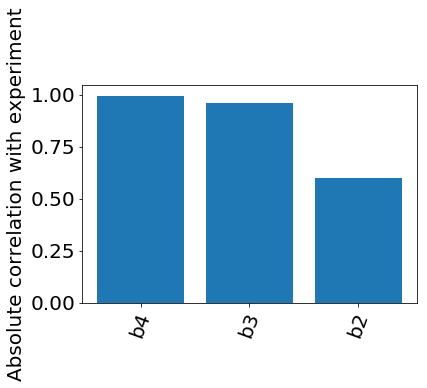

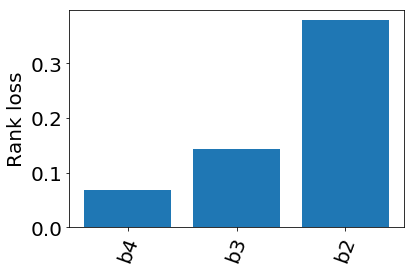

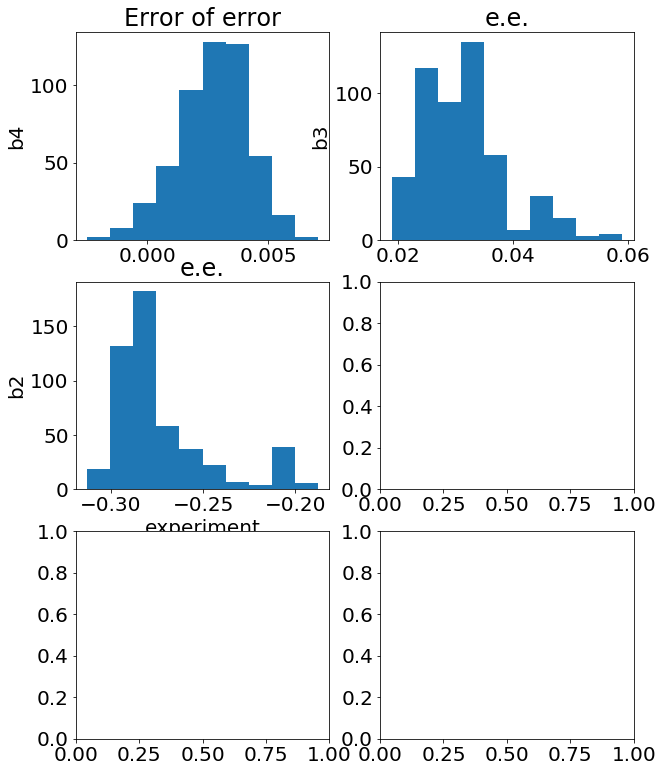

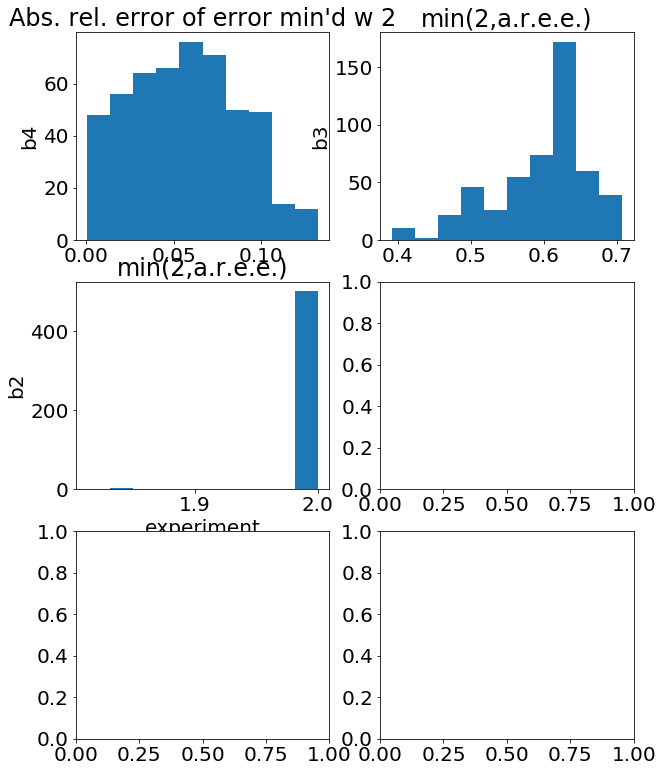

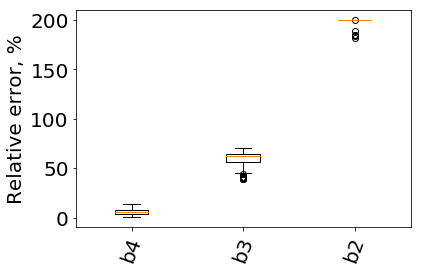

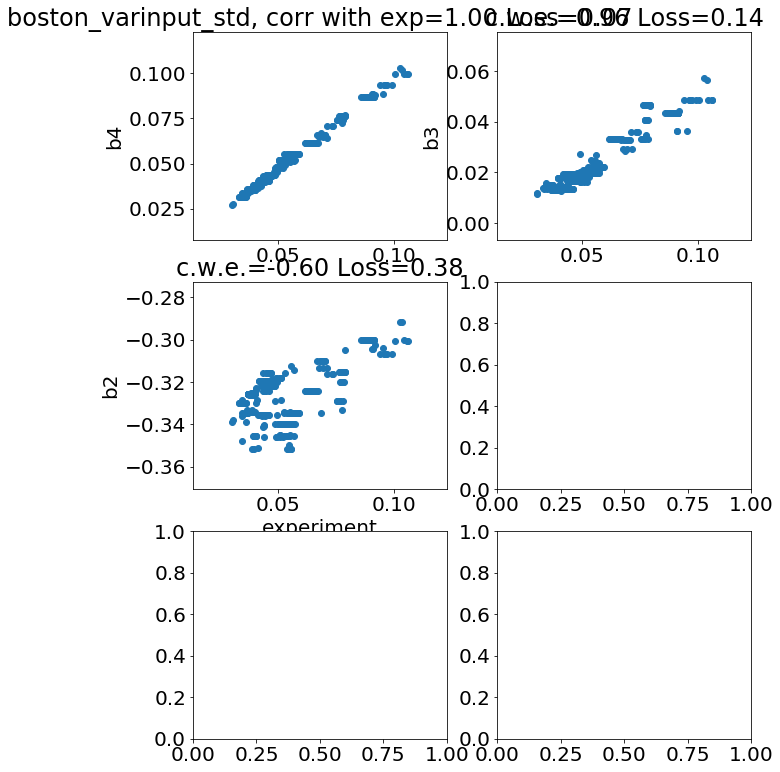

,bound,corr,rank_loss
0,b4,0.996231,0.068540
1,b3,0.958407,0.143498
2,b2,-0.600250,0.378758


In [7]:
# showing results for std
exp.process_scalar_output(rstd, 'boston_varinput_std')

### Fixing the data point and comparing different networks on it

In [8]:
# pfailure for the first layer
p = 1e-2

np.random.seed(42)

# obtaining some experiment
exp = BostonHousingExperiment(N = [50, 50], epochs = 0, p_inference = [0, p, 0, 0], activation = 'relu', do_print = True)

# input to test
data = exp.get_inputs(1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 50)                700       
_________________________________________________________________
dense_11 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 51        
Total params: 3,301
Trainable params: 3,301
Non-trainable params: 0
_________________________________________________________________
Train on 404 samples, validate on 102 samples
Creating network for 13-dimensional input and 1-dimensional output, with 2 hidden layers
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 50)                700       
_________________________________________________________________
lambd

In [29]:
# array with networks
results_mean = []
results_std = []

# looking at 50 random networks
for i in tqdm(range(20)):
    # for some reason np.random.randn inside BostonHousingExperiment always uses the same seed...
    seed = int(np.random.rand() * 10000)
    
    # run with random weights and single input
    exp = BostonHousingExperiment(N = [50, 50], epochs = 20, p_inference = [0, p, 0, 0], activation = 'relu', seed = seed)

    # obtaining data
    rmean, rstd = exp.run(data, repetitions = 10000)
    
    # adding to results
    results_mean += [rmean]
    results_std += [rstd]
    
    # removing the model
    K.clear_session()

100%|██████████| 20/20 [00:19<00:00,  1.00it/s]


In [9]:
fn = 'ErrorComparisonBostonSingleInput.pkl'

In [ ]:
pickle.dump((results_mean, results_std), open(fn, 'wb'))
from google.colab import files
files.download(fn)

In [10]:
results_mean, results_std = pickle.load(open(fn, 'rb'))

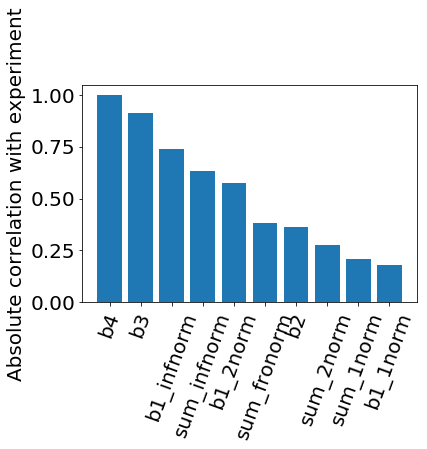

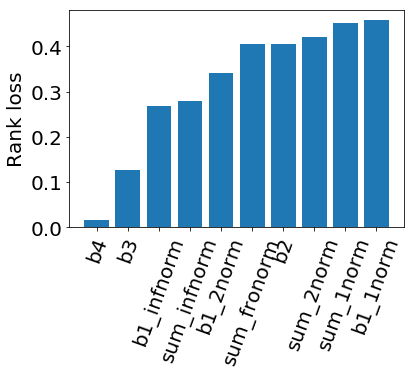

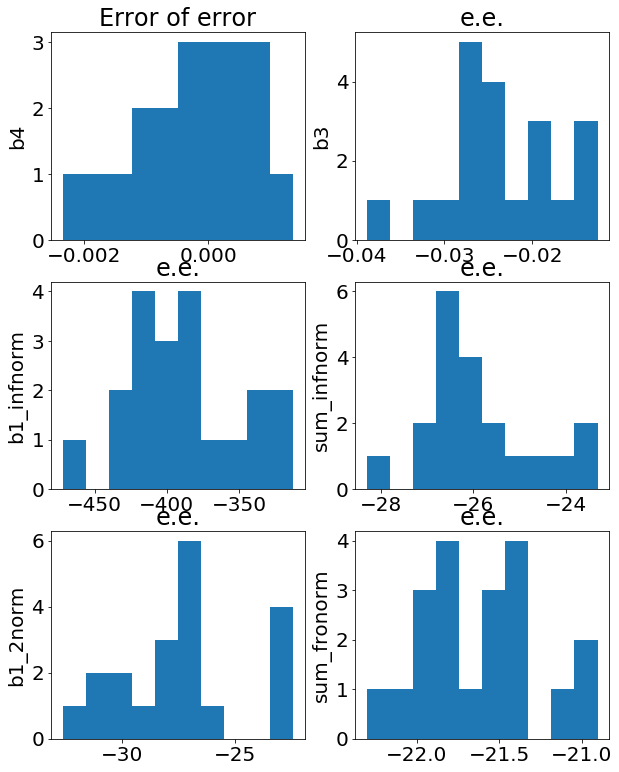

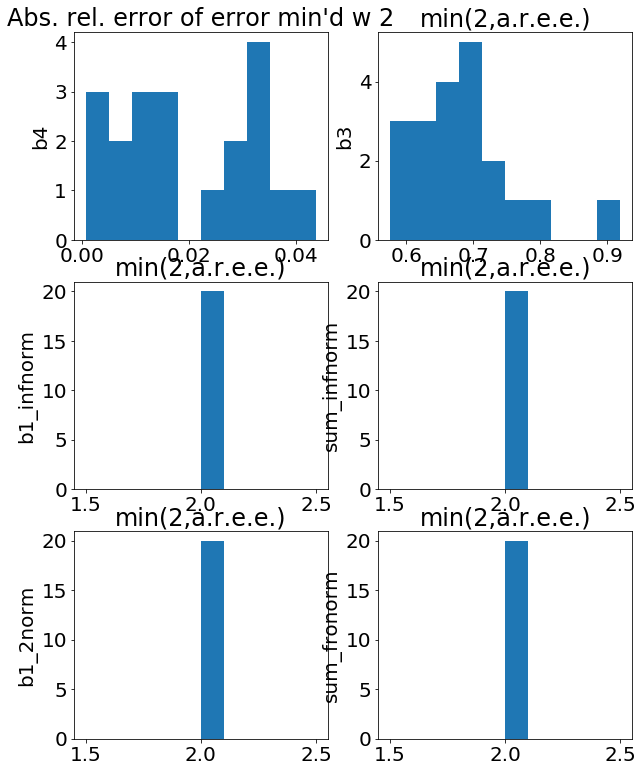

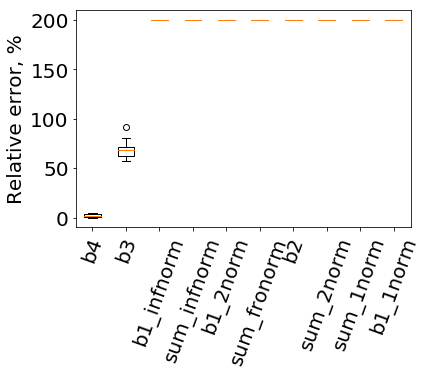

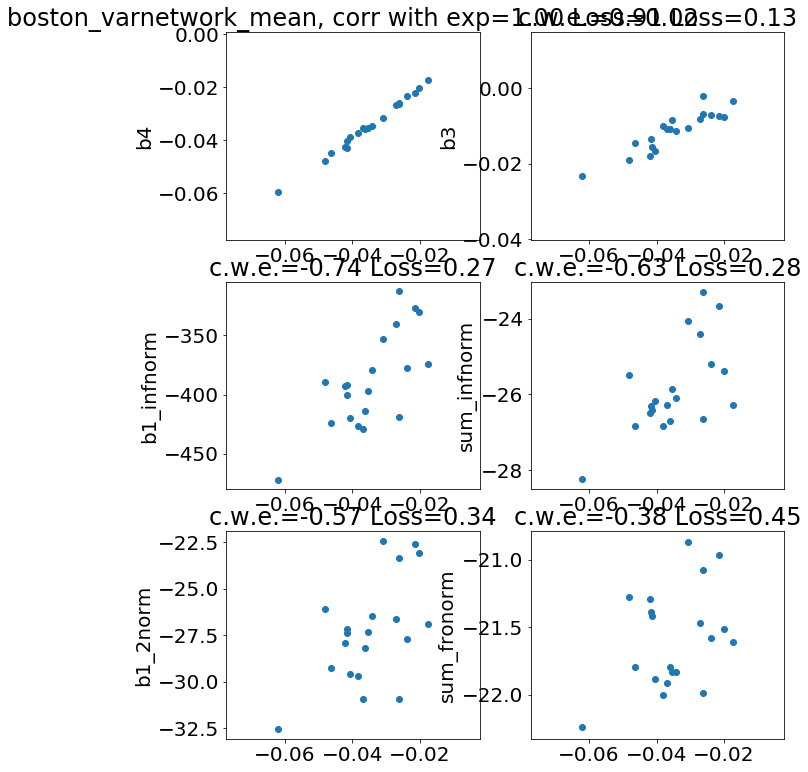

,bound,corr,rank_loss
0,b4,0.996975,0.015789
1,b3,0.913158,0.126316
2,b1_infnorm,-0.738251,0.268421
3,sum_infnorm,-0.632145,0.278947
4,b1_2norm,-0.574987,0.342105
5,sum_fronorm,-0.380096,0.452632
6,b2,-0.362913,0.405263
7,sum_2norm,-0.276136,0.405263
8,sum_1norm,-0.211161,0.421053
9,b1_1norm,-0.179057,0.457895


In [11]:
exp.process_scalar_output(exp.preprocess_scalar_input_scalar_output(results_mean), 'boston_varnetwork_mean')

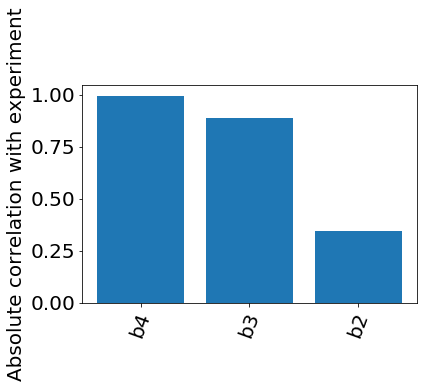

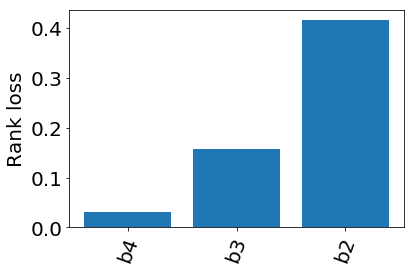

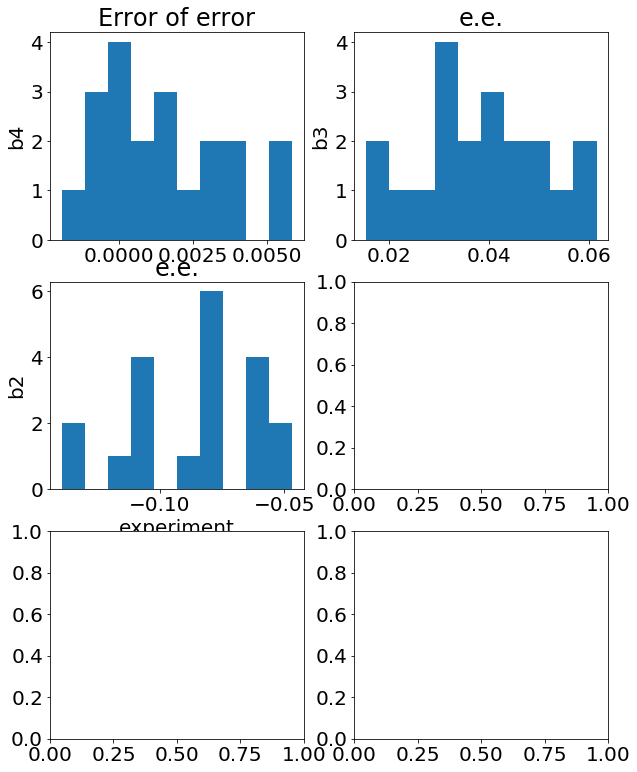

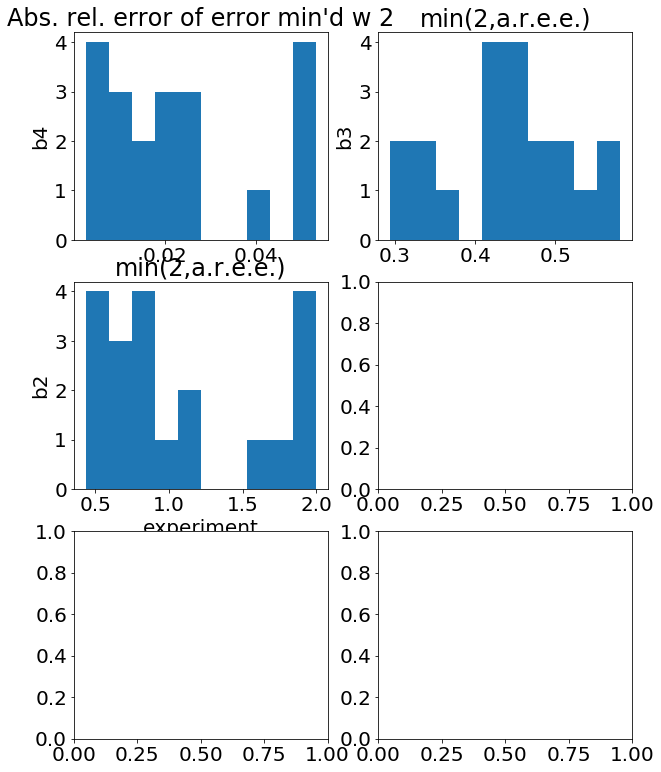

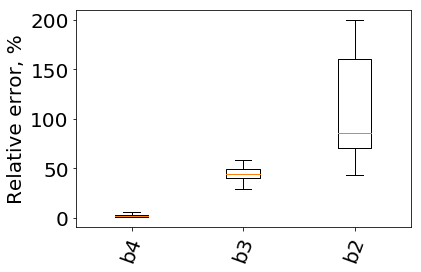

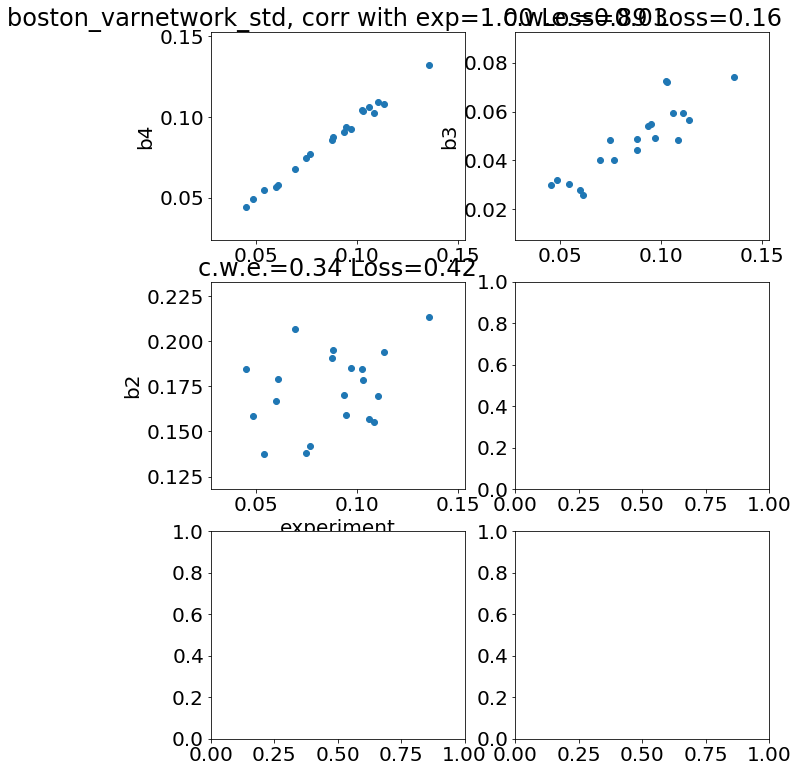

,bound,corr,rank_loss
0,b4,0.996142,0.031579
1,b3,0.887222,0.157895
2,b2,0.344504,0.415789


In [12]:
exp.process_scalar_output(exp.preprocess_scalar_input_scalar_output(results_std), 'boston_varnetwork_std')